In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
pd.set_option('display.max_columns', None)

training_set = pd.read_csv('UNSW_NB15_training-set.csv')
testing_set = pd.read_csv('UNSW_NB15_testing-set.csv')

print(training_set.shape)
print(testing_set.shape)

(82332, 45)
(175341, 45)


In [2]:
frames = [training_set, testing_set]
train = pd.concat(frames)
print(train.shape)
train.head(100)

(257673, 45)


,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.090200,254,0,1.803636e+08,0.000000,0,0,0.011000,0.000000,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,248,0,0,0,2,2,1,1,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.000300,254,0,8.810000e+08,0.000000,0,0,0.008000,0.000000,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,881,0,0,0,2,2,1,1,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.005100,254,0,8.544000e+08,0.000000,0,0,0.005000,0.000000,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,534,0,0,0,3,2,1,1,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.660800,254,0,6.000000e+08,0.000000,0,0,0.006000,0.000000,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,450,0,0,0,3,2,2,2,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.002500,254,0,8.504000e+08,0.000000,0,0,0.010000,0.000000,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,1063,0,0,0,3,2,2,2,1,3,0,0,0,2,3,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,16.044233,tcp,-,REQ,12,0,540,0,0.685605,254,0,2.468177e+02,0.000000,11,0,1458.566750,0.000000,2845.959000,0.000000,255,0,0,0,0.000000,0.000000,0.000000,45,0,0,0,8,6,5,2,2,7,0,0,0,5,8,0,Normal,0
96,97,0.664512,tcp,-,FIN,10,6,534,268,22.572957,254,252,5.790716e+03,2696.715820,2,1,69.994778,114.784602,3565.853629,166.495000,255,2600388172,623342715,255,0.148054,0.090584,0.057470,53,45,0,0,5,1,1,1,1,3,0,0,0,2,3,0,Normal,0
97,98,0.860208,tcp,-,FIN,10,6,534,268,17.437643,254,252,4.473337e+03,2083.217041,2,1,95.474667,156.240203,4650.146095,225.094078,255,2537299422,4130059309,255,0.167170,0.079005,0.088165,53,45,0,0,5,1,1,1,1,3,0,0,0,1,3,0,Normal,0
98,99,15.102544,tcp,-,REQ,10,0,450,0,0.595926,254,0,2.145334e+02,0.000000,9,0,1678.060500,0.000000,3601.728750,0.000000,255,0,0,0,0.000000,0.000000,0.000000,45,0,0,0,11,6,2,2,2,11,0,0,0,3,11,0,Normal,0


In [3]:
print(train.columns.values)

['id' 'dur' 'proto' 'service' 'state' 'spkts' 'dpkts' 'sbytes' 'dbytes'
 'rate' 'sttl' 'dttl' 'sload' 'dload' 'sloss' 'dloss' 'sinpkt' 'dinpkt'
 'sjit' 'djit' 'swin' 'stcpb' 'dtcpb' 'dwin' 'tcprtt' 'synack' 'ackdat'
 'smean' 'dmean' 'trans_depth' 'response_body_len' 'ct_srv_src'
 'ct_state_ttl' 'ct_dst_ltm' 'ct_src_dport_ltm' 'ct_dst_sport_ltm'
 'ct_dst_src_ltm' 'is_ftp_login' 'ct_ftp_cmd' 'ct_flw_http_mthd'
 'ct_src_ltm' 'ct_srv_dst' 'is_sm_ips_ports' 'attack_cat' 'label']


In [4]:
binary_dict = {'Normal': 'normal',
                'Generic': 'attack',
                'Exploits': 'attack',
                'Fuzzers': 'attack',
                'DoS': 'attack',
              'Reconnaissance': 'attack',
                'Analysis': 'attack',
                'Backdoor': 'attack',
                'Shellcode': 'attack',
               'Worms': 'attack'
              }

df_train_bi = train.copy()


df_train_bi['attack_cat'] = df_train_bi['attack_cat'].apply(binary_dict.get)



print('Train data class: ',df_train_bi['attack_cat'].unique())


print('Train data dim: ',df_train_bi.shape)


Train data class:  ['normal' 'attack']
Train data dim:  (257673, 45)


In [5]:
mask = (df_train_bi.dtypes == np.object)
print(df_train_bi.loc[:,mask].head())
list_cat = df_train_bi.loc[:,mask].columns.tolist()
print(list_cat)
print(df_train_bi.loc[:,mask].values)

  proto service state attack_cat
0   udp       -   INT     normal
1   udp       -   INT     normal
2   udp       -   INT     normal
3   udp       -   INT     normal
4   udp       -   INT     normal
['proto', 'service', 'state', 'attack_cat']
[['udp' '-' 'INT' 'normal']
 ['udp' '-' 'INT' 'normal']
 ['udp' '-' 'INT' 'normal']
 ...
 ['udp' 'dns' 'INT' 'attack']
 ['udp' 'dns' 'INT' 'attack']
 ['udp' 'dns' 'INT' 'attack']]


In [6]:
mask = (df_train_bi.dtypes != np.object)
print(df_train_bi.loc[:,mask].head())
list_num = df_train_bi.loc[:,mask].columns.tolist()
print(list_num)
print(df_train_bi.loc[:,mask].values)

   id       dur  spkts  dpkts  sbytes  dbytes         rate  sttl  dttl  \
0   1  0.000011      2      0     496       0   90909.0902   254     0   
1   2  0.000008      2      0    1762       0  125000.0003   254     0   
2   3  0.000005      2      0    1068       0  200000.0051   254     0   
3   4  0.000006      2      0     900       0  166666.6608   254     0   
4   5  0.000010      2      0    2126       0  100000.0025   254     0   

         sload  dload  sloss  dloss  sinpkt  dinpkt  sjit  djit  swin  stcpb  \
0  180363632.0    0.0      0      0   0.011     0.0   0.0   0.0     0      0   
1  881000000.0    0.0      0      0   0.008     0.0   0.0   0.0     0      0   
2  854400000.0    0.0      0      0   0.005     0.0   0.0   0.0     0      0   
3  600000000.0    0.0      0      0   0.006     0.0   0.0   0.0     0      0   
4  850400000.0    0.0      0      0   0.010     0.0   0.0   0.0     0      0   

   dtcpb  dwin  tcprtt  synack  ackdat  smean  dmean  trans_depth  \
0    

In [7]:
df_train_bi.loc[:,mask].describe()

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
count,257673.000000,257673.000000,257673.000000,257673.000000,2.576730e+05,2.576730e+05,2.576730e+05,257673.000000,257673.000000,2.576730e+05,2.576730e+05,257673.000000,257673.000000,257673.000000,257673.000000,2.576730e+05,257673.000000,257673.000000,2.576730e+05,2.576730e+05,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,2.576730e+05,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000
mean,72811.823858,1.246715,19.777144,18.514703,8.572952e+03,1.438729e+04,9.125391e+04,180.000931,84.754957,7.060869e+07,6.582143e+05,4.889317,6.743691,912.300834,98.915462,5.419373e+03,582.251456,121.753661,1.006120e+09,1.002295e+09,119.254629,0.046038,0.023652,0.022386,137.639027,121.649703,0.102242,1.968900e+03,9.383176,1.324978,6.050467,5.238271,4.032677,8.322964,0.012819,0.012850,0.132005,6.800045,9.121049,0.014274,0.639077
std,48929.917641,5.974305,135.947152,111.985965,1.737739e+05,1.461993e+05,1.603446e+05,102.488268,112.762131,1.857313e+08,2.412372e+06,65.574953,53.702222,6922.153239,1094.048691,4.903450e+04,3930.153369,127.367443,1.367795e+09,1.363877e+09,127.230477,0.092908,0.053856,0.045771,205.901118,254.041013,0.710593,4.962523e+04,10.829706,0.992300,8.173749,8.160822,5.831515,11.120754,0.116091,0.116421,0.681854,8.396266,10.874752,0.118618,0.480269
min,1.000000,0.000000,1.000000,0.000000,2.400000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,24.000000,0.000000,0.000000,0.000000e+00,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,32210.000000,0.000008,2.000000,0.000000,1.140000e+02,0.000000e+00,3.078928e+01,62.000000,0.000000,1.231800e+04,0.000000e+00,0.000000,0.000000,0.008000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,57.000000,0.000000,0.000000,0.000000e+00,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000
50%,64419.000000,0.004285,4.000000,2.000000,5.280000e+02,1.780000e+02,2.955665e+03,254.000000,29.000000,7.439423e+05,1.747441e+03,0.000000,0.000000,0.381696,0.007000,6.736370e-01,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,73.000000,44.000000,0.000000,0.000000e+00,5.000000,1.000000,2.000000,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,4.000000,0.000000,1.000000
75%,110923.000000,0.685777,12.000000,10.000000,1.362000e+03,1.064000e+03,1.250000e+05,254.000000,252.000000,8.000000e+07,2.210538e+04,3.000000,2.000000,58.094727,56.438859,2.787367e+03,119.712937,255.000000,2.007375e+09,1.992752e+09,255.000000,0.082082,0.036842,0.044665,100.000000,89.000000,0.000000,0.000000e+00,12.000000,2.000000,6.000000,4.000000,3.000000,8.000000,0.000000,0.000000,0.000000,8.000000,11.000000,0.000000,1.000000
max,175341.000000,59.999989,10646.000000,11018.000000,1.435577e+07,1.465753e+07,1.000000e+06,255.000000,254.000000,5.988000e+09,2.242273e+07,5319.000000,5507.000000,84371.496000,57739.240000,1.483831e+06,463199.240100,255.000000,4.294959e+09,4.294882e+09,255.000000,3.821465,3.226788,2.928778,1504.000000,1500.000000,172.000000,6.558056e+06,63.000000,6.000000,59.000000,59.000000,46.000000,65.000000,4.000000,4.000000,30.000000,60.000000,62.000000,1.000000,1.000000


In [8]:
# number of occurrences for each attack category
df_train_bi.attack_cat.value_counts()

attack    164673
normal     93000
Name: attack_cat, dtype: int64

In [9]:
mask = (df_train_bi.label == 1)
print(df_train_bi.loc[mask,:].service.value_counts())
print(df_train_bi.loc[mask,:].proto.value_counts())

-           77434
dns         58100
http        17650
smtp         4695
ftp          3004
ftp-data     1890
pop3         1524
dhcp          120
snmp          108
ssl            86
irc            30
radius         17
ssh            15
Name: service, dtype: int64
udp       70682
tcp       56072
unas      15599
ospf       3169
sctp       1474
          ...  
egp         131
crtp        131
netblt      131
hmp         131
argus       131
Name: proto, Length: 129, dtype: int64


In [10]:
mask = (df_train_bi.label == 0)
print(df_train_bi.loc[mask,:].service.value_counts())
print(df_train_bi.loc[mask,:].proto.value_counts())

-           63887
dns         10561
http         9361
ftp-data     3501
smtp         2214
ftp          1976
ssh          1491
radius          4
pop3            4
snmp            1
Name: service, dtype: int64
tcp     66969
udp     22019
arp      3846
ospf      102
igmp       48
icmp       15
rtp         1
Name: proto, dtype: int64


In [11]:
Y = df_train_bi.label
X =  df_train_bi.drop(columns=['id','attack_cat','label'])
mask = (X.dtypes == np.object)
list_cat = X.loc[:,mask].columns.tolist()
list_cat

['proto', 'service', 'state']

In [12]:
X.shape

(257673, 42)

In [13]:
df_train_bi.label.unique()

array([0, 1], dtype=int64)

In [14]:
X = pd.get_dummies(X, columns=list_cat)
X.head()

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,proto_3pc,proto_a/n,proto_aes-sp3-d,proto_any,proto_argus,proto_aris,proto_arp,proto_ax.25,proto_bbn-rcc,proto_bna,proto_br-sat-mon,proto_cbt,proto_cftp,proto_chaos,proto_compaq-peer,proto_cphb,proto_cpnx,proto_crtp,proto_crudp,proto_dcn,proto_ddp,proto_ddx,proto_dgp,proto_egp,proto_eigrp,proto_emcon,proto_encap,proto_etherip,proto_fc,proto_fire,proto_ggp,proto_gmtp,proto_gre,proto_hmp,proto_i-nlsp,proto_iatp,proto_ib,proto_icmp,proto_idpr,proto_idpr-cmtp,proto_idrp,proto_ifmp,proto_igmp,proto_igp,proto_il,proto_ip,proto_ipcomp,proto_ipcv,proto_ipip,proto_iplt,proto_ipnip,proto_ippc,proto_ipv6,proto_ipv6-frag,proto_ipv6-no,proto_ipv6-opts,proto_ipv6-route,proto_ipx-n-ip,proto_irtp,proto_isis,proto_iso-ip,proto_iso-tp4,proto_kryptolan,proto_l2tp,proto_larp,proto_leaf-1,proto_leaf-2,proto_merit-inp,proto_mfe-nsp,proto_mhrp,proto_micp,proto_mobile,proto_mtp,proto_mux,proto_narp,proto_netblt,proto_nsfnet-igp,proto_nvp,proto_ospf,proto_pgm,proto_pim,proto_pipe,proto_pnni,proto_pri-enc,proto_prm,proto_ptp,proto_pup,proto_pvp,proto_qnx,proto_rdp,proto_rsvp,proto_rtp,proto_rvd,proto_sat-expak,proto_sat-mon,proto_sccopmce,proto_scps,proto_sctp,proto_sdrp,proto_secure-vmtp,proto_sep,proto_skip,proto_sm,proto_smp,proto_snp,proto_sprite-rpc,proto_sps,proto_srp,proto_st2,proto_stp,proto_sun-nd,proto_swipe,proto_tcf,proto_tcp,proto_tlsp,proto_tp++,proto_trunk-1,proto_trunk-2,proto_ttp,proto_udp,proto_unas,proto_uti,proto_vines,proto_visa,proto_vmtp,proto_vrrp,proto_wb-expak,proto_wb-mon,proto_wsn,proto_xnet,proto_xns-idp,proto_xtp,proto_zero,service_-,service_dhcp,service_dns,service_ftp,service_ftp-data,service_http,service_irc,service_pop3,service_radius,service_smtp,service_snmp,service_ssh,service_ssl,state_ACC,state_CLO,state_CON,state_ECO,state_FIN,state_INT,state_PAR,state_REQ,state_RST,state_URN,state_no
0,0.000011,2,0,496,0,90909.0902,254,0,180363632.0,0.0,0,0,0.011,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,248,0,0,0,2,2,1,1,1,2,0,0,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0.000008,2,0,1762,0,125000.0003,254,0,881000000.0,0.0,0,0,0.008,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,881,0,0,0,2,2,1,1,1,2,0,0,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0.000005,2,0,1068,0,200000.0051,254,0,854400000.0,0.0,0,0,0.005,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,534,0,0,0,3,2,1,1,1,3,0,0,0,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0.000006,2,0,900,0,166666.6608,254,0,600000000.0,0.0,0,0,0.006,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,450,0,0,0,3,2,2,2,1,3,0,0,0,2,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0.000010,2,0,2126,0,100000.0025,254,0,8504000

In [15]:
Y.shape

(257673,)

In [16]:
Y.unique()

array([0, 1], dtype=int64)

In [17]:
X.shape

(257673, 196)

In [18]:
import sklearn
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [19]:
y_train.unique()

array([1, 0], dtype=int64)

In [20]:
y_test.unique()

array([0, 1], dtype=int64)

In [21]:
# y_train[1].value_counts()

In [22]:
# X_train= X.iloc[X_train]
# print(X_train.shape)
# X_train.head()

In [23]:
# X_test= X.iloc[X_test]
# y_train=Y.iloc[y_train]
# y_test=Y.iloc[y_test]

In [24]:
# y_train[0].unique()

In [25]:
colNames_train=list(X_train.columns)
colNames_test=list(X_test.columns)

In [26]:
print(len(colNames_train))
print(len(colNames_test))

196
196


In [27]:
print("Training data dim: ",X_train.shape)
print("Testing data dim: ",X_test.shape)
print("Training label dim: ",y_train.shape)
print("Testing label dim: ",y_test.shape)

Training data dim:  (206138, 196)
Testing data dim:  (51535, 196)
Training label dim:  (206138,)
Testing label dim:  (51535,)


In [28]:
X_train.to_csv('X_train.csv', index=False)
X_test.to_csv('X_test.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
y_test.to_csv('y_test.csv', index=False)

In [29]:
#univariate feature selection with ANOVA F-test. using secondPercentile method, then RFE
#Scikit-learn exposes feature selection routines as objects that implement the transform method
#SelectPercentile: removes all but a user-specified highest scoring percentage of features
#f_classif: ANOVA F-value between label/feature for classification tasks.
from sklearn.feature_selection import SelectPercentile, f_classif
np.seterr(divide='ignore', invalid='ignore');
selector=SelectPercentile(f_classif, percentile=10)
X_newTrain = selector.fit_transform(X_train,y_train)
X_newTrain.shape

(206138, 20)

In [30]:
true=selector.get_support()
newcolindex_X_train=[i for i, x in enumerate(true) if x]
newcolname_X_train=list( colNames_train[i] for i in newcolindex_X_train )
newcolname_X_train

['rate',
 'sttl',
 'dload',
 'swin',
 'stcpb',
 'dtcpb',
 'dwin',
 'dmean',
 'ct_srv_src',
 'ct_state_ttl',
 'ct_src_dport_ltm',
 'ct_dst_sport_ltm',
 'ct_dst_src_ltm',
 'ct_src_ltm',
 'ct_srv_dst',
 'proto_tcp',
 'service_dns',
 'state_CON',
 'state_FIN',
 'state_INT']

In [31]:
## Feature Ranking

from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
# Create a decision tree classifier. By convention, clf means 'classifier'
clf = DecisionTreeClassifier(random_state=0)

#rank all features, i.e continue the elimination until the last one [Reduces 196 features to 20]
rfe = RFE(clf, n_features_to_select=1)
rfe.fit(X_newTrain, y_train)
print ("DoS Features sorted by their rank:")
print (sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), newcolname_X_train)))

DoS Features sorted by their rank:
[(1, 'sttl'), (2, 'rate'), (3, 'stcpb'), (4, 'ct_srv_dst'), (5, 'dmean'), (6, 'proto_tcp'), (7, 'dload'), (8, 'ct_dst_src_ltm'), (9, 'dtcpb'), (10, 'ct_src_dport_ltm'), (11, 'ct_dst_sport_ltm'), (12, 'ct_state_ttl'), (13, 'ct_srv_src'), (14, 'ct_src_ltm'), (15, 'service_dns'), (16, 'state_FIN'), (17, 'state_INT'), (18, 'state_CON'), (19, 'dwin'), (20, 'swin')]


In [32]:
##################################################
#####sample prediction###########################
clf=DecisionTreeClassifier(random_state=0)

clf.fit(X_newTrain, y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [33]:
X_newTest = X_test[newcolname_X_train]
# X_newTest = X_test.loc[:, newcolname_X_train]

clf.predict(X_newTest)

array([0, 1, 1, ..., 1, 1, 0], dtype=int64)

In [34]:
clf.predict(X_newTest)[0:10]

array([0, 1, 1, 1, 0, 0, 1, 0, 1, 1], dtype=int64)

In [35]:
y_pred = clf.predict(X_newTest)

pd.crosstab(y_test,y_pred, rownames=['Actual attacks'], colnames=['Predicted attacks'])

Predicted attacks,0,1
Actual attacks,,
0,16758,1917
1,1873,30987


In [36]:
### Prediction with selected 20 variables
from sklearn.model_selection import cross_val_score
from sklearn import metrics
accuracy = cross_val_score(clf, X_newTest, y_test,  scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))
precision = cross_val_score(clf, X_newTest, y_test,  scoring='precision')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))
recall = cross_val_score(clf, X_newTest, y_test,  scoring='recall')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))
f = cross_val_score(clf, X_newTest, y_test,  scoring='f1')
print("F-measure: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))

Accuracy: 0.91338 (+/- 0.00350)
Precision: 0.93130 (+/- 0.00849)
Recall: 0.93302 (+/- 0.00988)
F-measure: 0.93214 (+/- 0.00283)


In [37]:
dlf_all=DecisionTreeClassifier(random_state=0)

dlf_all.fit(X_train, y_train)

y_prediction = dlf_all.predict(X_test)

pd.crosstab(y_test,y_prediction, rownames=['Actual attacks'], colnames=['Predicted attacks'])

Predicted attacks,0,1
Actual attacks,,
0,17119,1556
1,1613,31247


In [38]:
### Prediction with selected all 123 variables
from sklearn.model_selection import cross_val_score
from sklearn import metrics
accuracy = cross_val_score(dlf_all, X_test, y_test,  scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))
precision = cross_val_score(dlf_all, X_test, y_test,  scoring='precision')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))
recall = cross_val_score(dlf_all, X_test, y_test, scoring='recall')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))
f = cross_val_score(dlf_all, X_test, y_test,  scoring='f1')
print("F-measure: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))

Accuracy: 0.92382 (+/- 0.00173)
Precision: 0.94134 (+/- 0.00417)
Recall: 0.93904 (+/- 0.00355)
F-measure: 0.94019 (+/- 0.00128)


In [39]:
##################################################################
##############End of sample Prediction###########################

In [40]:
from feature_selector import FeatureSelector

###############################
##################################
###https://towardsdatascience.com/a-feature-selection-tool-for-machine-learning-in-python-b64dd23710f0########

In [41]:
X_train.shape

(206138, 196)

In [42]:
FS_df_train= pd.concat([X_train, y_train], axis=1, sort=False)
FS_df_train.shape

(206138, 197)

In [43]:
y_train.shape

(206138,)

In [44]:

fs = FeatureSelector(data = X_train, labels = y_train )

In [45]:
fs.identify_missing(missing_threshold = 0.6)

0 features with greater than 0.60 missing values.



In [46]:
fs.identify_collinear(correlation_threshold = 0.80)

21 features with a correlation magnitude greater than 0.80.



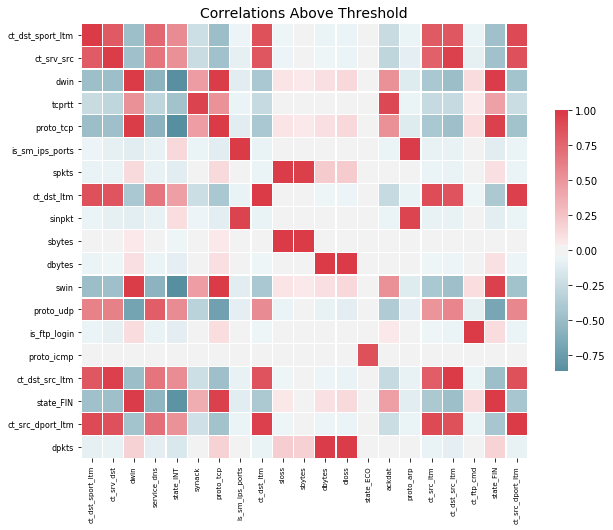

In [47]:
fs.plot_collinear()

In [48]:
# list of collinear features to remove
collinear_features = fs.ops['collinear']
# dataframe of collinear features
fs.record_collinear.head(21)

,drop_feature,corr_feature,corr_value
0,sbytes,spkts,0.964065
1,dbytes,dpkts,0.972966
2,sloss,spkts,0.971578
3,sloss,sbytes,0.995699
4,dloss,dpkts,0.979316
5,dloss,dbytes,0.996612
6,dwin,swin,0.980664
7,synack,tcprtt,0.945829
8,ackdat,tcprtt,0.919371
9,ct_dst_ltm,ct_srv_src,0.840543


In [49]:
# Pass in the appropriate parameters
fs.identify_zero_importance(task = 'classification', 
                            eval_metric = 'auc', 
                            n_iterations = 10, 
                             early_stopping = True)
# list of zero importance features
zero_importance_features = fs.ops['zero_importance']

Training Gradient Boosting Model

Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[1000]	valid_0's auc: 0.992041	valid_0's binary_logloss: 0.106589
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[997]	valid_0's auc: 0.993081	valid_0's binary_logloss: 0.100162
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[999]	valid_0's auc: 0.991937	valid_0's binary_logloss: 0.107004
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[999]	valid_0's auc: 0.992788	valid_0's binary_logloss: 0.101983
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[999]	valid_0's auc: 0.992299	valid_0's binary_logloss: 0.105191
Training until validation scores don't improve for 100 rounds
Did not meet early stopping.

In [50]:
print(zero_importance_features)

['proto_secure-vmtp', 'state_URN', 'proto_sprite-rpc', 'proto_snp', 'proto_skip', 'proto_sm', 'proto_sdrp', 'proto_smp', 'proto_rtp', 'proto_scps', 'proto_sccopmce', 'proto_sat-mon', 'proto_sat-expak', 'proto_rsvp', 'proto_rdp', 'proto_qnx', 'proto_pvp', 'proto_pup', 'proto_ptp', 'proto_prm', 'proto_pri-enc', 'proto_sps', 'state_ECO', 'proto_srp', 'proto_stp', 'state_CLO', 'state_ACC', 'service_ssh', 'state_PAR', 'proto_pnni', 'proto_zero', 'proto_xtp', 'proto_xns-idp', 'proto_xnet', 'proto_wsn', 'proto_wb-mon', 'proto_wb-expak', 'proto_vrrp', 'proto_vmtp', 'proto_visa', 'proto_vines', 'proto_uti', 'proto_ttp', 'proto_trunk-2', 'proto_trunk-1', 'proto_tp++', 'proto_tcp', 'proto_tcf', 'proto_swipe', 'proto_sun-nd', 'proto_tlsp', 'proto_isis', 'proto_pipe', 'proto_crtp', 'proto_dcn', 'proto_ddp', 'proto_ddx', 'proto_dgp', 'proto_egp', 'proto_eigrp', 'proto_emcon', 'proto_encap', 'proto_etherip', 'proto_fc', 'proto_fire', 'proto_ggp', 'proto_gmtp', 'proto_hmp', 'proto_i-nlsp', 'proto_crud

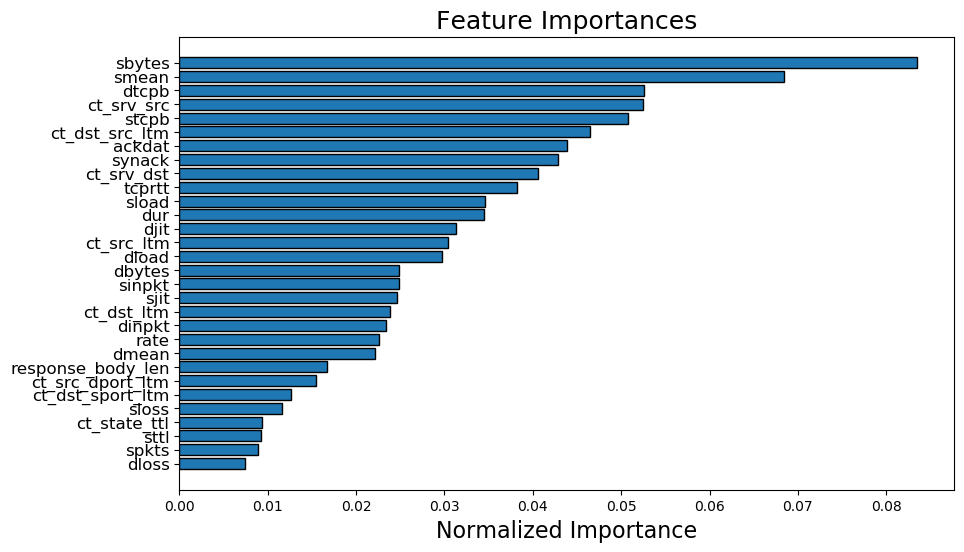

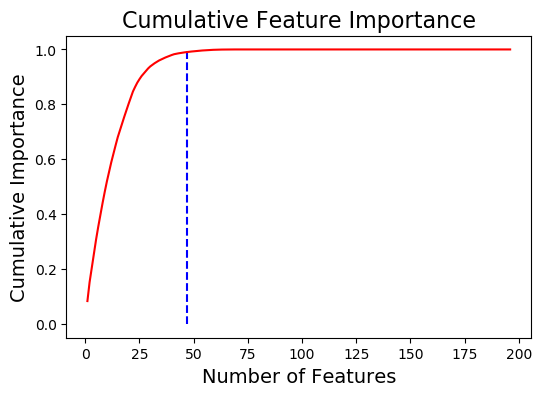

47 features required for 0.99 of cumulative importance


In [51]:
# plot the feature importances
fs.plot_feature_importances(threshold = 0.99, plot_n = 30)

In [52]:
fs.identify_low_importance(cumulative_importance = 0.99)

46 features required for cumulative importance of 0.99 after one hot encoding.
150 features do not contribute to cumulative importance of 0.99.



In [53]:
fs.feature_importances.head(50)

,feature,importance,normalized_importance,cumulative_importance
0,sbytes,2499.7,0.083507,0.083507
1,smean,2048.8,0.068444,0.151951
2,dtcpb,1575.6,0.052636,0.204587
3,ct_srv_src,1572.0,0.052516,0.257102
4,stcpb,1519.7,0.050768,0.307871
5,ct_dst_src_ltm,1391.8,0.046496,0.354366
6,ackdat,1311.9,0.043826,0.398193
7,synack,1282.2,0.042834,0.441027
8,ct_srv_dst,1215.6,0.040609,0.481636
9,tcprtt,1145.5,0.038268,0.519904


In [54]:
fs.identify_single_unique()

0 features with a single unique value.



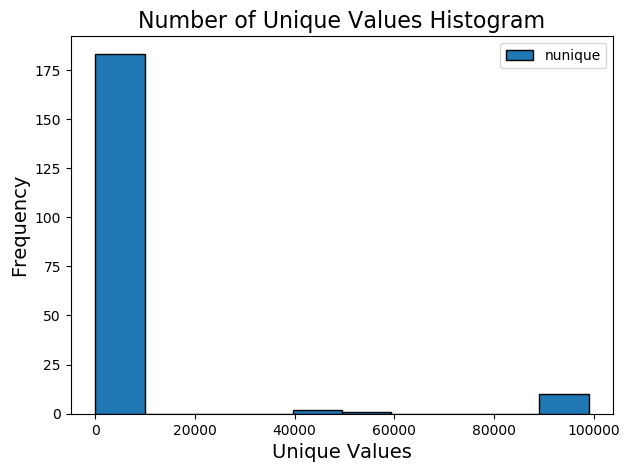

In [55]:
fs.plot_unique()

In [56]:
fs.identify_all(selection_params = {'missing_threshold': 0.6,    
                                    'correlation_threshold': 0.90, 
                                    'task': 'classification',    
                                    'eval_metric': 'auc', 
                                    'cumulative_importance': 0.90})

0 features with greater than 0.60 missing values.

0 features with a single unique value.

17 features with a correlation magnitude greater than 0.90.

Training Gradient Boosting Model

Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[1000]	valid_0's auc: 0.99247	valid_0's binary_logloss: 0.103853
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[995]	valid_0's auc: 0.992646	valid_0's binary_logloss: 0.102991
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[996]	valid_0's auc: 0.992595	valid_0's binary_logloss: 0.103122
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[998]	valid_0's auc: 0.992796	valid_0's binary_logloss: 0.102699
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[993

In [57]:
fs.feature_importances.head(50)

,feature,importance,normalized_importance,cumulative_importance
0,sbytes,2423.9,0.081162,0.081162
1,smean,2030.2,0.067979,0.149141
2,ct_srv_src,1582.4,0.052985,0.202126
3,dtcpb,1537.1,0.051468,0.253595
4,stcpb,1519.7,0.050886,0.304480
5,ct_dst_src_ltm,1398.7,0.046834,0.351314
6,ackdat,1335.7,0.044725,0.396039
7,synack,1290.5,0.043211,0.439250
8,ct_srv_dst,1223.6,0.040971,0.480221
9,tcprtt,1098.5,0.036782,0.517003


In [58]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_extraction.text import CountVectorizer

In [59]:
from info_gain import info_gain

In [60]:

var_dict={}

for i in X_train.columns:
    ig=info_gain.info_gain(X_train[i], y_train)
    print('Information Gain of {} is : {}'.format(i,ig))
    var_dict.update({i: ig})


Information Gain of dur is : 0.53920544530496
Information Gain of spkts is : 0.16108304661521
Information Gain of dpkts is : 0.24271487333693242
Information Gain of sbytes is : 0.4721808869636277
Information Gain of dbytes is : 0.3487137703700318
Information Gain of rate is : 0.5396819961287198
Information Gain of sttl is : 0.3076048889769557
Information Gain of dttl is : 0.3035448141157595
Information Gain of sload is : 0.6182319259102407
Information Gain of dload is : 0.4937777631755118
Information Gain of sloss is : 0.10983128248083118
Information Gain of dloss is : 0.1267401884767867
Information Gain of sinpkt is : 0.4568420158287161
Information Gain of dinpkt is : 0.4808613284239147
Information Gain of sjit is : 0.4170511531024683
Information Gain of djit is : 0.39155235317863113
Information Gain of swin is : 0.0677541810204757
Information Gain of stcpb is : 0.3812609184378326
Information Gain of dtcpb is : 0.3811391835695144
Information Gain of dwin is : 0.05822726188475391
Infor

Information Gain of proto_snp is : 0.00022567214838756493
Information Gain of proto_sprite-rpc is : 0.0002343547151751474
Information Gain of proto_sps is : 0.00022133094471564474
Information Gain of proto_srp is : 0.00021916036280945645
Information Gain of proto_st2 is : 0.0002452082226302643
Information Gain of proto_stp is : 0.0002365253900904335
Information Gain of proto_sun-nd is : 0.00045583202984611753
Information Gain of proto_swipe is : 0.00044062818457427967
Information Gain of proto_tcf is : 0.00023218405354745626
Information Gain of proto_tcp is : 0.06770682071615053
Information Gain of proto_tlsp is : 0.00021481923885631384
Information Gain of proto_tp++ is : 0.00024303749456321827
Information Gain of proto_trunk-1 is : 0.00024303749456321827
Information Gain of proto_trunk-2 is : 0.00022350153990825534
Information Gain of proto_ttp is : 0.0002386960782935245
Information Gain of proto_udp is : 0.01900922234015634
Information Gain of proto_unas is : 0.028183408956901274
Inf

In [61]:

sorted(var_dict.items())

[('ackdat', 0.34009946209189046),
 ('ct_dst_ltm', 0.08332549462034056),
 ('ct_dst_sport_ltm', 0.15021731859380183),
 ('ct_dst_src_ltm', 0.08202764358702241),
 ('ct_flw_http_mthd', 0.0008541128366405526),
 ('ct_ftp_cmd', 8.157087400992302e-05),
 ('ct_src_dport_ltm', 0.0940769515189146),
 ('ct_src_ltm', 0.07454808536817037),
 ('ct_srv_dst', 0.0973816932181153),
 ('ct_srv_src', 0.08274904032390751),
 ('ct_state_ttl', 0.3136587682562172),
 ('dbytes', 0.3487137703700318),
 ('dinpkt', 0.4808613284239147),
 ('djit', 0.39155235317863113),
 ('dload', 0.4937777631755118),
 ('dloss', 0.1267401884767867),
 ('dmean', 0.2837122648851427),
 ('dpkts', 0.24271487333693242),
 ('dtcpb', 0.3811391835695144),
 ('dttl', 0.3035448141157595),
 ('dur', 0.53920544530496),
 ('dwin', 0.05822726188475391),
 ('is_ftp_login', 8.388484042214095e-05),
 ('is_sm_ips_ports', 0.015042261567853168),
 ('proto_3pc', 0.0002386960782935245),
 ('proto_a/n', 0.00022784277015374006),
 ('proto_aes-sp3-d', 0.0002343547151751474),
 

In [62]:
var_dict_R={}

for i in X_train.columns:
    ig=info_gain.info_gain_ratio(X_train[i], y_train)
    print('Information Gain of {} is : {}'.format(i,ig))
    var_dict_R.update({i: ig})

Information Gain of dur is : 0.5717090610271974
Information Gain of spkts is : 0.17079322571695635
Information Gain of dpkts is : 0.2573458661091833
Information Gain of sbytes is : 0.5006442235914149
Information Gain of dbytes is : 0.3697344378871219
Information Gain of rate is : 0.5722143386098995
Information Gain of sttl is : 0.32614748937657473
Information Gain of dttl is : 0.32184267085738893
Information Gain of sload is : 0.6554993035340705
Information Gain of dload is : 0.5235429719770766
Information Gain of sloss is : 0.1164519756342885
Information Gain of dloss is : 0.13438016025133645
Information Gain of sinpkt is : 0.48438071644378633
Information Gain of dinpkt is : 0.5098479270773014
Information Gain of sjit is : 0.442191237526675
Information Gain of djit is : 0.4151553552137053
Information Gain of swin is : 0.07183844219150101
Information Gain of stcpb is : 0.4042435468417462
Information Gain of dtcpb is : 0.40411447372524395
Information Gain of dwin is : 0.0617372348669253

Information Gain of proto_smp is : 0.0002300700643306458
Information Gain of proto_snp is : 0.0002392757958549094
Information Gain of proto_sprite-rpc is : 0.0002484817527840484
Information Gain of proto_sps is : 0.00023467290191789134
Information Gain of proto_srp is : 0.0002323714760805323
Information Gain of proto_st2 is : 0.0002599895159382339
Information Gain of proto_stp is : 0.00025078327723714744
Information Gain of proto_sun-nd is : 0.0004833098479227248
Information Gain of proto_swipe is : 0.0004671895060751955
Information Gain of proto_tcf is : 0.0002461802424195283
Information Gain of proto_tcp is : 0.0717882269806728
Information Gain of proto_tlsp is : 0.0002277686666677858
Information Gain of proto_tp++ is : 0.00025768793512935615
Information Gain of proto_trunk-1 is : 0.00025768793512935615
Information Gain of proto_trunk-2 is : 0.00023697434184258593
Information Gain of proto_ttp is : 0.00025308481577904793
Information Gain of proto_udp is : 0.020155109243753102
Informa

In [63]:
sorted(var_dict_R.items())

[('ackdat', 0.3606008541298035),
 ('ct_dst_ltm', 0.08834840357014379),
 ('ct_dst_sport_ltm', 0.15927250533368423),
 ('ct_dst_src_ltm', 0.08697231732681616),
 ('ct_flw_http_mthd', 0.0009055992518229761),
 ('ct_ftp_cmd', 8.648801341575016e-05),
 ('ct_src_dport_ltm', 0.09974796450128709),
 ('ct_src_ltm', 0.07904188701786465),
 ('ct_srv_dst', 0.10325191793914394),
 ('ct_srv_src', 0.0877372002757252),
 ('ct_state_ttl', 0.3325662999958946),
 ('dbytes', 0.3697344378871219),
 ('dinpkt', 0.5098479270773014),
 ('djit', 0.4151553552137053),
 ('dload', 0.5235429719770766),
 ('dloss', 0.13438016025133645),
 ('dmean', 0.30081460410261257),
 ('dpkts', 0.2573458661091833),
 ('dtcpb', 0.40411447372524395),
 ('dttl', 0.32184267085738893),
 ('dur', 0.5717090610271974),
 ('dwin', 0.061737234866925346),
 ('is_ftp_login', 8.894146705999031e-05),
 ('is_sm_ips_ports', 0.01594901778452742),
 ('proto_3pc', 0.00025308481577904793),
 ('proto_a/n', 0.00024157726395503834),
 ('proto_aes-sp3-d', 0.000248481752784048

In [64]:

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [65]:
# Feature extraction
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X_train, y_train)

# Summarize scores
np.set_printoptions(precision=3)
# print(fit.scores_)

features = fit.transform(X)
# Summarize selected features
print(features[0:5,:])

[[1.804e+08 0.000e+00 0.000e+00 0.000e+00]
 [8.810e+08 0.000e+00 0.000e+00 0.000e+00]
 [8.544e+08 0.000e+00 0.000e+00 0.000e+00]
 [6.000e+08 0.000e+00 0.000e+00 0.000e+00]
 [8.504e+08 0.000e+00 0.000e+00 0.000e+00]]


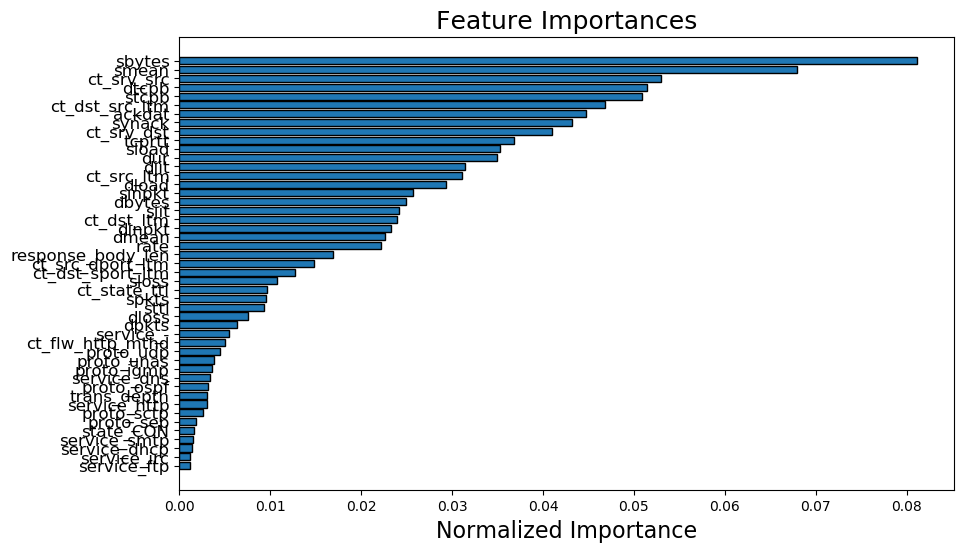

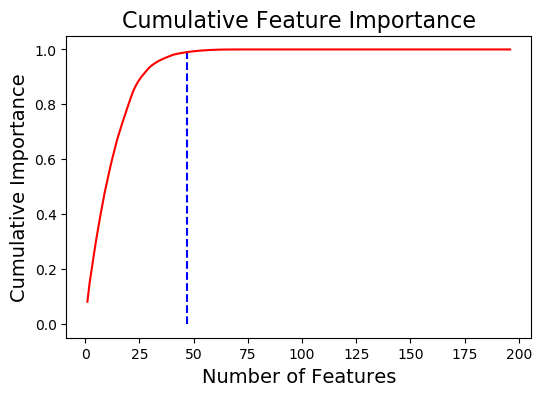

47 features required for 0.99 of cumulative importance


In [66]:
# plot the feature importances
fs.plot_feature_importances(threshold = 0.99, plot_n = 47)